In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("mcd.csv")
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [4]:
print(df.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [5]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [6]:
df.shape

(1453, 15)

In [7]:
print(df.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [8]:
MD_x = df.iloc[:, 0:11].values
MD_x = (MD_x == "Yes").astype(int)
col_means = np.round(np.mean(MD_x, axis=0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


     Age
Age  1.0


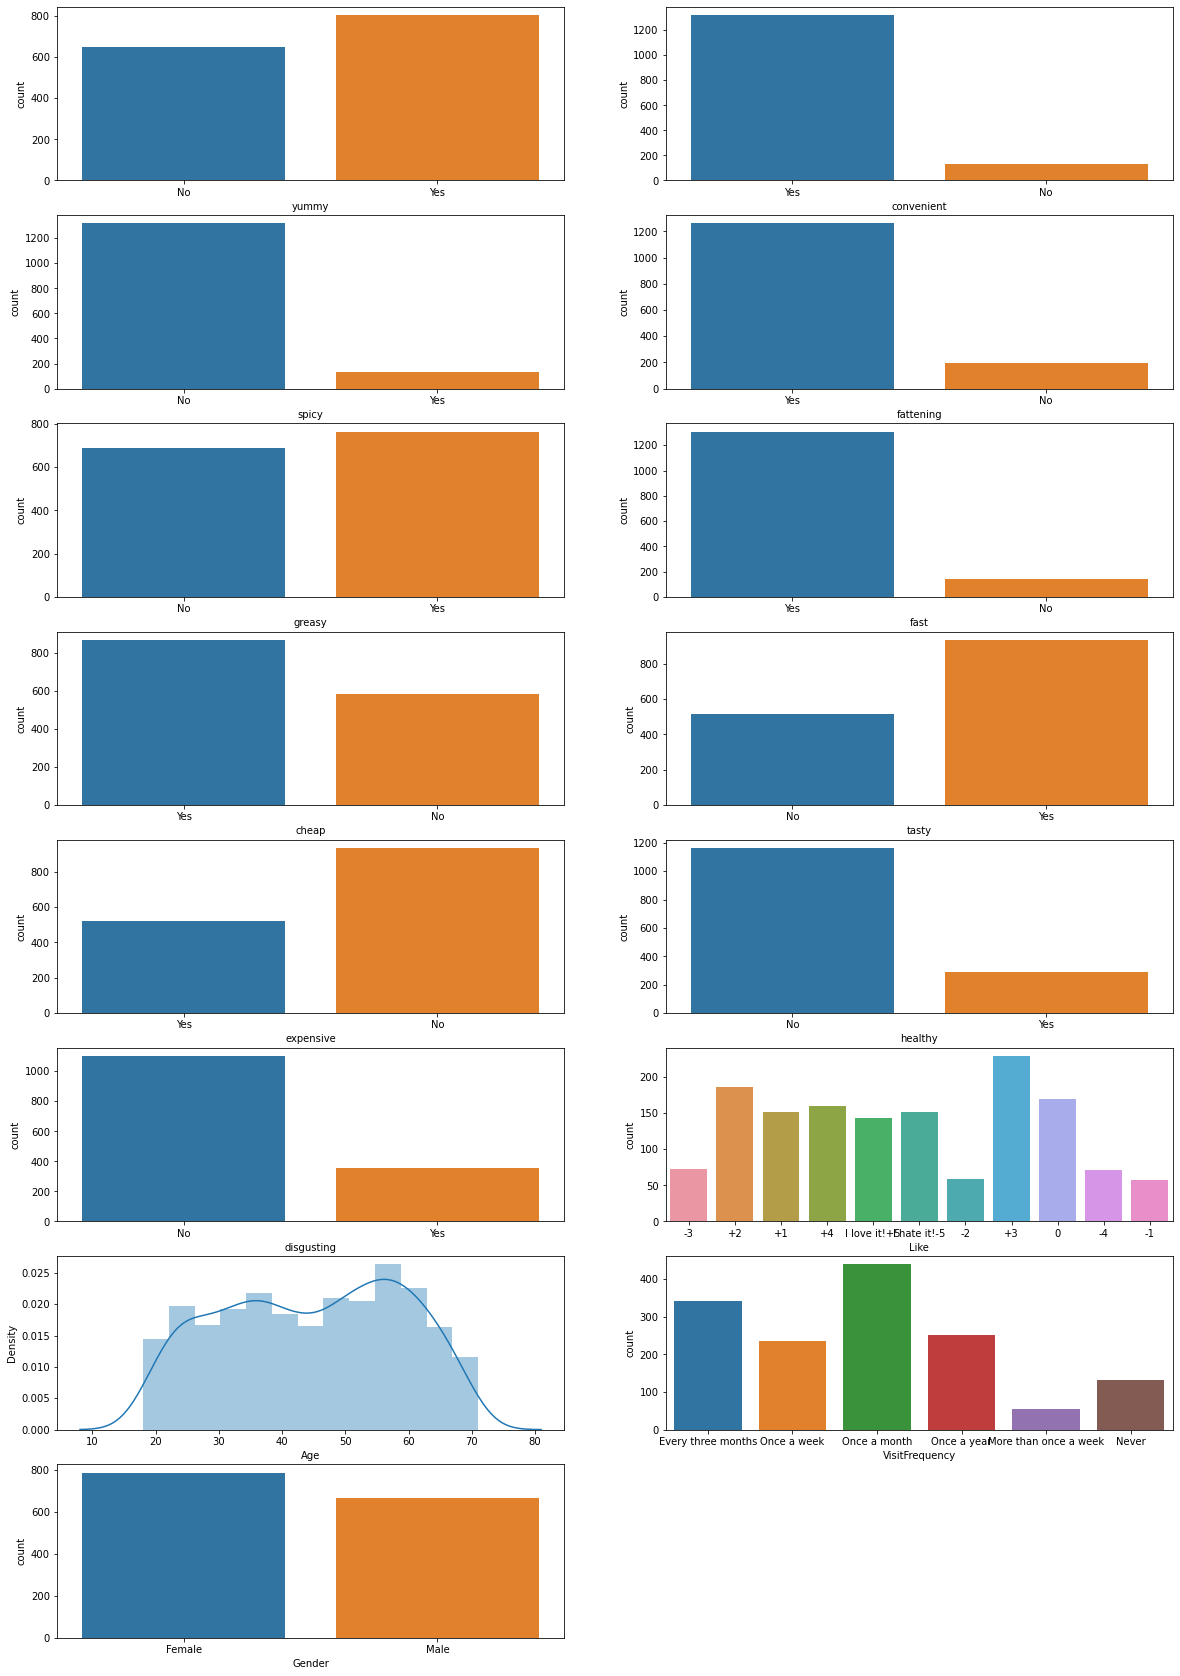

In [9]:
# defining a function to perform EDA
def EDA(df,figuresize):
    cat = []
    con = []
    from warnings import filterwarnings
    filterwarnings("ignore")
    u = int((df.shape[1]+1)/2)
    plt.figure(figsize=figuresize)
    x = 1

    for i in df.columns:
        if(df[i].dtypes == "object"):
            cat.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.countplot(df[i])
        else:
            con.append(i)
            plt.subplot(u,2,x)
            x = x+1
            sns.distplot(df[i])

    print(df.corr())

# applying the function on the dataset
EDA(df, (20, 30))

In [10]:
# Perform PCA on the dataset
from sklearn.decomposition import PCA

MD_pca = PCA()
MD_pca.fit(MD_x)

# Display the summary of the PCA results
print(MD_pca.get_covariance())

[[ 0.24739828  0.0365393   0.00126697 -0.01469601 -0.03772522  0.01593265
   0.02561623  0.16371893 -0.01472303  0.04909383 -0.08959046]
 [ 0.0365393   0.08377556  0.00243962  0.00358193 -0.01546103  0.02109343
   0.02151102  0.04016578 -0.02275761  0.01146862 -0.04231769]
 [ 0.00126697  0.00243962  0.08489702 -0.00408768  0.00784877  0.00177129
   0.00245763  0.00853369  0.00642444  0.01236209  0.00410427]
 [-0.01469601  0.00358193 -0.00408768  0.11526451  0.05414181  0.00464177
  -0.00443464 -0.01423719  0.01451163 -0.0458764   0.02127308]
 [-0.03772522 -0.01546103  0.00784877  0.05414181  0.24946961 -0.0087176
  -0.01794236 -0.03911922  0.03527659 -0.04211956  0.06897148]
 [ 0.01593265  0.02109343  0.00177129  0.00464177 -0.0087176   0.08989665
   0.03706637  0.02094128 -0.02899956  0.00402227 -0.01774992]
 [ 0.02561623  0.02151102  0.00245763 -0.00443464 -0.01794236  0.03706637
   0.24041169  0.0327545  -0.16966654  0.02545318 -0.02642059]
 [ 0.16371893  0.04016578  0.00853369 -0.0

In [11]:
# Print the PCA results with 1 decimal place
print(np.round(MD_pca.components_, 1))

[[-0.5 -0.2 -0.   0.1  0.3 -0.1 -0.3 -0.5  0.3 -0.2  0.4]
 [ 0.4  0.   0.  -0.  -0.1 -0.1 -0.6  0.3  0.6  0.1 -0.1]
 [-0.3 -0.1 -0.  -0.3 -0.8 -0.1 -0.1 -0.3  0.   0.2 -0.1]
 [ 0.1 -0.1  0.2 -0.4  0.3 -0.1  0.1 -0.   0.1  0.8  0.4]
 [-0.3  0.3  0.1 -0.1  0.4  0.1 -0.1 -0.2 -0.   0.3 -0.7]
 [ 0.2 -0.3 -0.4 -0.4  0.2 -0.6 -0.1 -0.1 -0.3 -0.2 -0.2]
 [-0.3 -0.1  0.7 -0.4  0.  -0.1 -0.   0.4 -0.1 -0.3 -0. ]
 [ 0.  -0.1  0.4  0.6 -0.1 -0.6  0.1 -0.1  0.   0.2 -0.2]
 [ 0.6 -0.   0.4 -0.2 -0.   0.2  0.1 -0.6  0.1 -0.2 -0.1]
 [-0.1 -0.7 -0.1 -0.   0.   0.2  0.4  0.1  0.5 -0.  -0.3]
 [ 0.  -0.5  0.1  0.3  0.   0.3 -0.5  0.  -0.5  0.2 -0. ]]


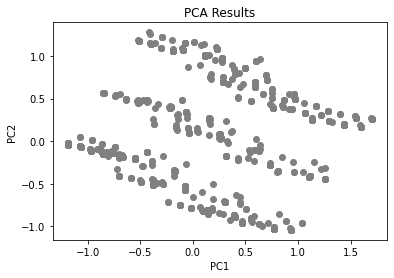

In [12]:
# Plot the PCA results
plt.scatter(MD_pca.transform(MD_x)[:, 0], MD_pca.transform(MD_x)[:, 1], c="grey")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Results')
plt.show()

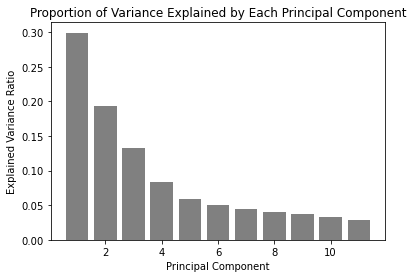

In [13]:
# Plot the projection axes for the PCA results
plt.bar(range(1, MD_pca.n_components_ + 1), MD_pca.explained_variance_ratio_, color='grey')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Proportion of Variance Explained by Each Principal Component')
plt.show()

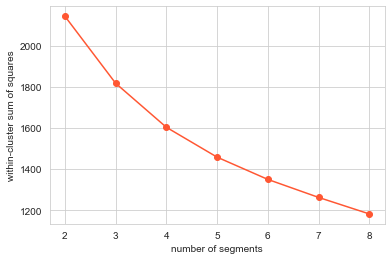

In [46]:
np.random.seed(1234)
# Stepwise K-means clustering with 2 to 8 clusters and 10 repetitions
k_range = range(2, 9)
k_means_models = [KMeans(n_clusters=k, n_init=10).fit(MD_x) for k in k_range]
plt.plot(k_range, [model.inertia_ for model in k_means_models], marker='o')
plt.xlabel("number of segments")
plt.ylabel("within-cluster sum of squares")
plt.show()

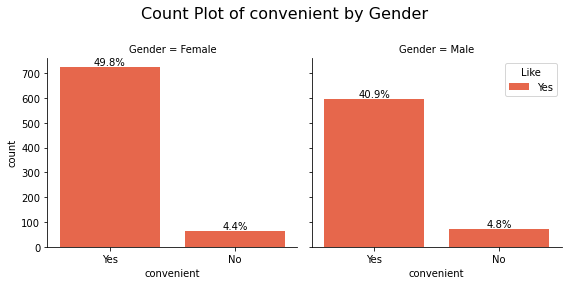

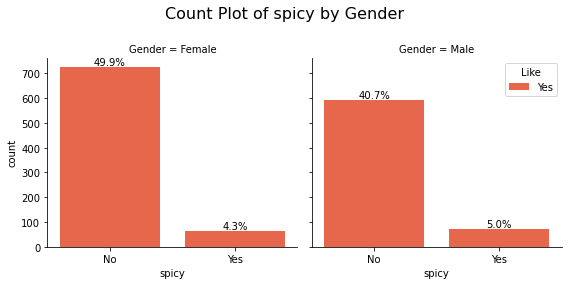

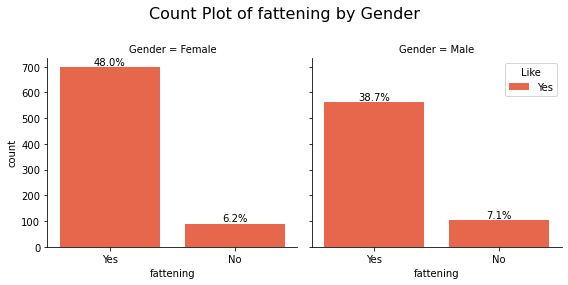

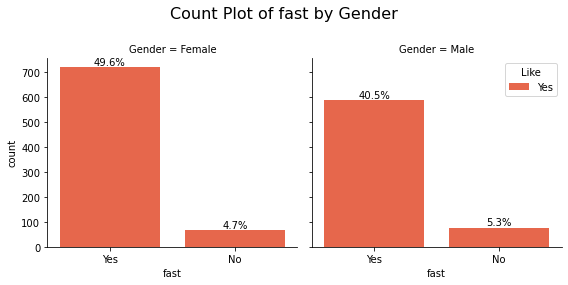

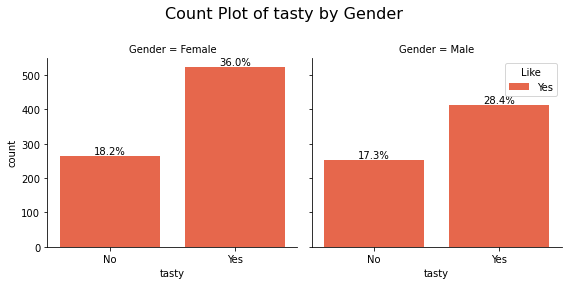

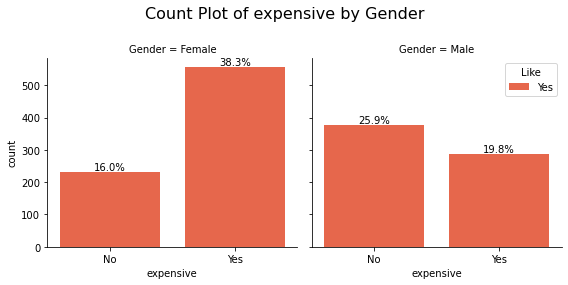

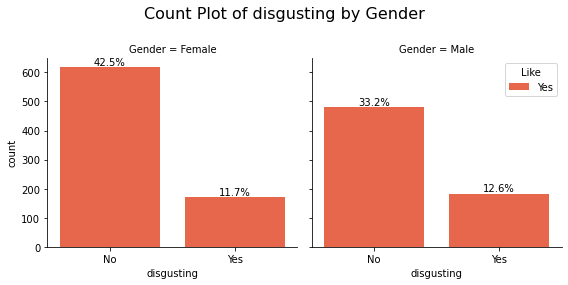

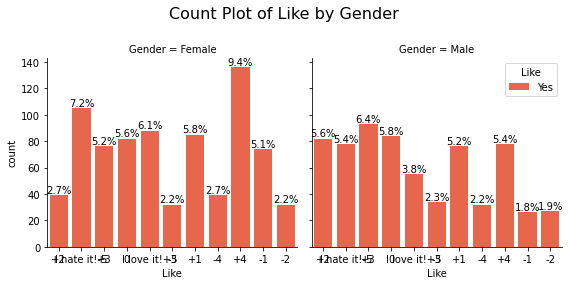

In [14]:
custom_palette = ['#FF5733', '#40E0D0', '#40E0D0', '#C97BCB']


sns.set_palette(custom_palette)


for i in df.drop(['Gender', 'yummy', 'cheap', 'healthy', 'greasy', 'Age', 'VisitFrequency'], axis=1):
    grid = sns.FacetGrid(df, height=4, col='Gender')
    grid = grid.map(sns.countplot, i)

    for ax in grid.axes.flat:
        total = float(len(df[i]))
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center', va='bottom')

    plt.subplots_adjust(top=0.8)
    grid.fig.suptitle('Count Plot of ' + i + ' by Gender', fontsize=16)
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.legend(title='Like', labels=['Yes', 'No'])

plt.show()

In [15]:
df['yummy'] = df['yummy'].replace(['Yes', 'No'], [1, 0])
df['convenient'] = df['convenient'].replace(['Yes', 'No'], [1, 0])
df['spicy'] = df['spicy'].replace(['Yes', 'No'], [1, 0])
df['fattening'] = df['fattening'].replace(['Yes', 'No'], [1, 0])
df['greasy'] = df['greasy'].replace(['Yes', 'No'], [1, 0])
df['fast'] = df['fast'].replace(['Yes', 'No'], [1, 0])
df['cheap'] = df['cheap'].replace(['Yes', 'No'], [1, 0])
df['tasty'] = df['tasty'].replace(['Yes', 'No'], [1, 0])
df['expensive'] = df['expensive'].replace(['Yes', 'No'], [1, 0])
df['healthy'] = df['healthy'].replace(['Yes', 'No'], [1, 0])
df['disgusting'] = df['disgusting'].replace(['Yes', 'No'], [1, 0])
df['Gender'] = df['Gender'].replace(['Male', 'Female'], [1, 0])
df['VisitFrequency'] = df['VisitFrequency'].replace(['Never', 'Once a year', 'Every three months', 'Once a month', 'Once a week', 'More than once a week'], [0, 1, 2, 3, 4, 5])
df['Like'] = df['Like'].replace(['I hate it!-5', '-4', '-3', '-2', '-1', '0', '+1', '+2', '+3', '+4', 'I love it!+5'], [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])

     

In [16]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,2,0
1,1,1,0,1,1,1,1,1,1,0,0,2,51,2,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,2,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,49,3,1


In [17]:
df_new = df.drop(labels=['Like','Age','VisitFrequency','Gender'], axis=1) 
     

In [18]:
df_new.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0


In [19]:
# k-means clustering 
from sklearn.cluster import KMeans
from collections import Counter
model = KMeans()
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_new)
df['cluster_num'] = kmeans.labels_ #adding to df
# label assigned for each data point
print ('Labels:', kmeans.labels_)
# gives within-cluster sum of squares (WCSS) 
print ('WCSS:', kmeans.inertia_)
# number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print('No. of iterations: ', kmeans.n_iter_)
# location of the centroids on each cluster
print('Cluster centroids: ', kmeans.cluster_centers_)
# checking each cluster size
print('Cluster size: ', Counter(kmeans.labels_))
     

Labels: [2 0 0 ... 0 1 3]
WCSS: 1603.0604440558948
No. of iterations:  7
Cluster centroids:  [[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]
Cluster size:  Counter({1: 580, 0: 323, 2: 304, 3: 246})


In [20]:
from sklearn import preprocessing
pca_data = preprocessing.scale(df_new)
pca = PCA(n_components=11)
pc = pca.fit_transform(pca_data)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.704334,-0.437016,0.268698,-0.872074,-1.521184,0.470160,-0.030969,-0.687116,0.367598,0.321161,1.701170
1,-0.467820,0.364277,-1.596835,-0.004835,0.462385,-0.449321,0.087351,0.446003,0.221855,0.191268,1.467681
2,0.191986,1.712949,-0.339413,3.368168,-1.266802,0.148058,-0.606634,-0.668576,1.377226,-1.259300,-0.128530
3,-0.116991,-1.155122,-1.003913,0.469589,1.141750,-0.857182,0.015843,0.390275,-1.578539,0.092189,-0.233201
4,-0.034724,-1.390267,0.792275,0.473031,-0.270488,-0.847963,-1.804085,-0.700019,1.630339,0.092449,-0.033144


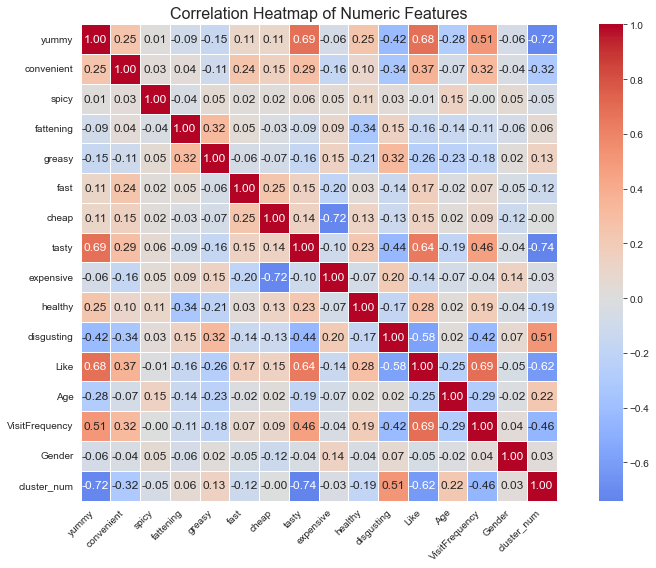

In [23]:


custom_palette = ['#F768A1', '#00BFC4', '#FFC300', '#3D5A80']

sns.set_style('whitegrid')

corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0, annot=True, fmt='.2f', linewidths=0.5, annot_kws={'size': 12}, square=True)

plt.title('Correlation Heatmap of Numeric Features', fontsize=16)

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

plt.tight_layout()
plt.savefig('count7.png')
plt.show()

In [25]:
from sklearn.decomposition import PCA

In [26]:
# transforming the data by PCA and viewing it from a diffrent lens

x = df.iloc[:, :11].values

pca = PCA(n_components=11)
pc_x = pca.fit_transform(x)

pc_x

array([[ 0.42536706, -0.21907878,  0.6632553 , ...,  0.18100693,
         0.51570617, -0.56707389],
       [-0.21863768,  0.38818996, -0.73082668, ...,  0.11147641,
         0.49331285, -0.50044033],
       [ 0.37541475,  0.73043507, -0.12203978, ..., -0.32228786,
         0.06175857,  0.24274108],
       ...,
       [-0.18589445,  1.06266156,  0.22085675, ...,  0.03825472,
         0.05651822, -0.01279977],
       [-1.18206441, -0.03856977,  0.56156066, ...,  0.02226748,
        -0.00257265, -0.10531631],
       [ 1.55024186,  0.27503101, -0.01373727, ..., -0.13658866,
        -0.43279782, -0.45607556]])

In [28]:
# converting the pc_x back to dataframe so that we can use pandas tools to visulaize eassily

pc_cols = []
for i in range(1, 12):
    pc_cols.append('PC' + str(i))
    
df_pc = pd.DataFrame(data = pc_x, columns=pc_cols)
df_pc.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245


In [29]:
pca.explained_variance_

array([0.57312398, 0.36900226, 0.2546408 , 0.15904032, 0.11384214,
       0.09627033, 0.08392454, 0.07569209, 0.07035814, 0.06192225,
       0.05612296])

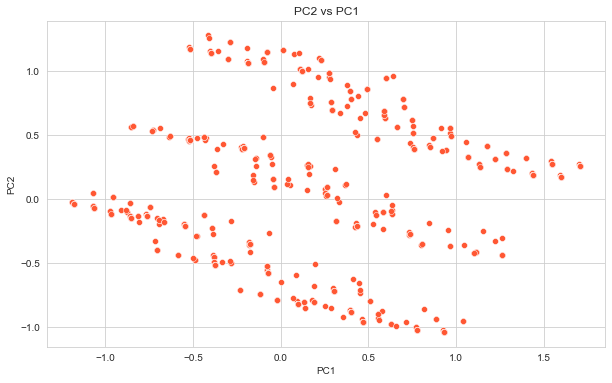

In [30]:
# plotting PCA1 and PCA2

plt.figure(figsize = (10 ,6))
sns.scatterplot(x = df_pc['PC1'],y = df_pc['PC2'])
plt.title('PC2 vs PC1')
plt.show()

In [32]:
# finding loadings

# PCA loadings are the coefficients of the linear combination of the original variables from which the principal components (PCs) are constructed.

# Loadings Matrix = V * (E)^0.5
# Where V is pca.components_.T and E is np.sqrt(pca.explained_variance_)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings.shape

(11, 11)

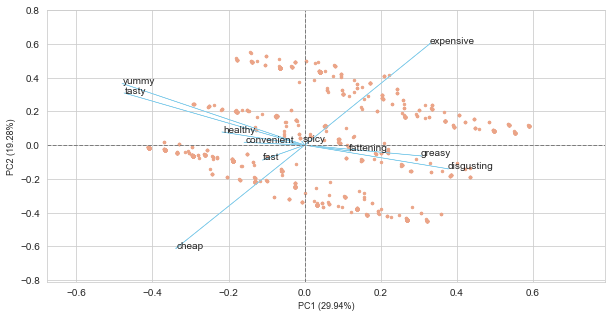

In [34]:
from bioinfokit.visuz import cluster

# plotiing the 2D biplot

cluster.biplot(cscore=df_pc.values, loadings=pca.components_, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

In [36]:
from sklearn.cluster import KMeans

# we will try for many values of k from 2 to 8
cluster_interia = []
n_clusters = []

for k in range(1, 9):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(x)
    cluster_interia.append(kmeans.inertia_)
    n_clusters.append(k)

Text(0.5, 1.0, 'Kmeans')

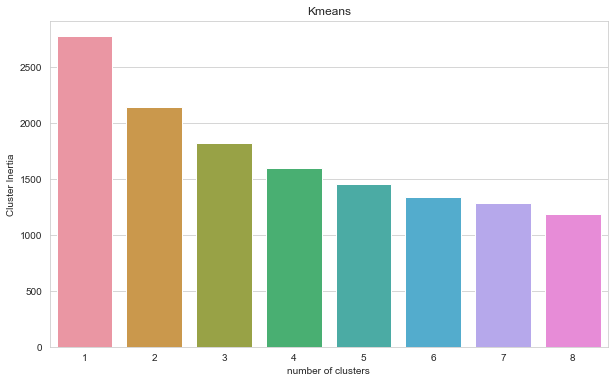

In [37]:
plt.figure(figsize = (10, 6))
sns.barplot(x = n_clusters, y = cluster_interia)
plt.xlabel('number of clusters')
plt.ylabel('Cluster Inertia')
plt.title('Kmeans')

In [38]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x)

KMeans(n_clusters=4)

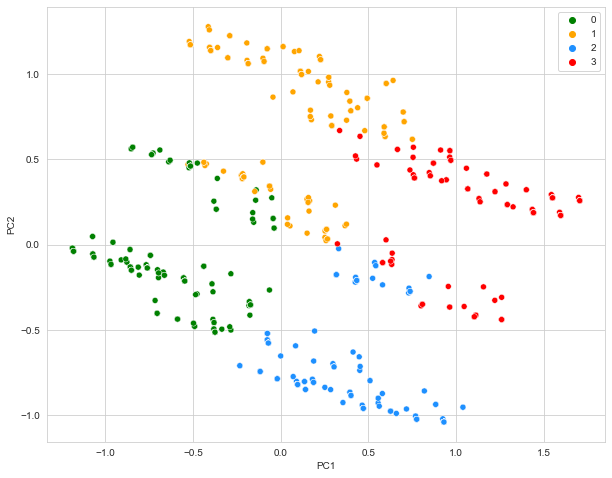

In [39]:
pred = kmeans.predict(x)

plt.figure(figsize = (10, 8))

sns.scatterplot(x = df_pc['PC1'], y = df_pc['PC2'], hue = pred,
                palette=['green','orange','dodgerblue','red'])

plt.show()